Question a:

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


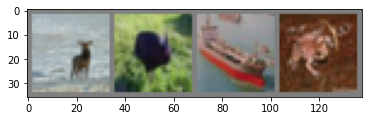

deer  bird  ship  frog 


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

CNN

In [15]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
acc_cnn = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_cnn.append(acc)
print('Finished Training')

[1,  2000] loss: 2.225
[1,  4000] loss: 1.847
[1,  6000] loss: 1.675
[1,  8000] loss: 1.572
[1, 10000] loss: 1.508
[1, 12000] loss: 1.469
[2,  2000] loss: 1.407
[2,  4000] loss: 1.353
[2,  6000] loss: 1.324
[2,  8000] loss: 1.305
[2, 10000] loss: 1.293
[2, 12000] loss: 1.292
[3,  2000] loss: 1.195
[3,  4000] loss: 1.224
[3,  6000] loss: 1.200
[3,  8000] loss: 1.203
[3, 10000] loss: 1.189
[3, 12000] loss: 1.170
[4,  2000] loss: 1.099
[4,  4000] loss: 1.108
[4,  6000] loss: 1.101
[4,  8000] loss: 1.130
[4, 10000] loss: 1.101
[4, 12000] loss: 1.096
[5,  2000] loss: 1.019
[5,  4000] loss: 1.030
[5,  6000] loss: 1.032
[5,  8000] loss: 1.044
[5, 10000] loss: 1.040
[5, 12000] loss: 1.047
[6,  2000] loss: 0.963
[6,  4000] loss: 0.971
[6,  6000] loss: 0.967
[6,  8000] loss: 0.983
[6, 10000] loss: 0.987
[6, 12000] loss: 1.009
[7,  2000] loss: 0.877
[7,  4000] loss: 0.923
[7,  6000] loss: 0.925
[7,  8000] loss: 0.944
[7, 10000] loss: 0.945
[7, 12000] loss: 0.961
[8,  2000] loss: 0.859
[8,  4000] 

With 0 hidden layer.

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.dropout(x)
        return x


net = Net()

In [43]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [44]:
acc_0 = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_0.append(acc)
print('Finished Training')

[1,  2000] loss: 2.113
[1,  4000] loss: 2.055
[1,  6000] loss: 2.041
[1,  8000] loss: 2.005
[1, 10000] loss: 2.026
[1, 12000] loss: 1.996
[2,  2000] loss: 1.987
[2,  4000] loss: 1.991
[2,  6000] loss: 2.012
[2,  8000] loss: 1.999
[2, 10000] loss: 2.008
[2, 12000] loss: 1.992
[3,  2000] loss: 1.956
[3,  4000] loss: 1.980
[3,  6000] loss: 1.972
[3,  8000] loss: 1.969
[3, 10000] loss: 1.990
[3, 12000] loss: 1.966
[4,  2000] loss: 1.956
[4,  4000] loss: 1.946
[4,  6000] loss: 1.940
[4,  8000] loss: 1.978
[4, 10000] loss: 1.951
[4, 12000] loss: 1.987
[5,  2000] loss: 1.920
[5,  4000] loss: 1.953
[5,  6000] loss: 1.932
[5,  8000] loss: 1.968
[5, 10000] loss: 1.955
[5, 12000] loss: 1.959
[6,  2000] loss: 1.908
[6,  4000] loss: 1.924
[6,  6000] loss: 1.935
[6,  8000] loss: 1.924
[6, 10000] loss: 1.930
[6, 12000] loss: 1.965
[7,  2000] loss: 1.910
[7,  4000] loss: 1.930
[7,  6000] loss: 1.910
[7,  8000] loss: 1.918
[7, 10000] loss: 1.932
[7, 12000] loss: 1.921
[8,  2000] loss: 1.869
[8,  4000] 

In [23]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

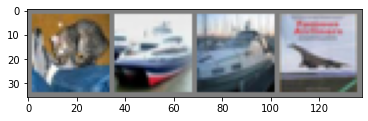

GroundTruth:  cat   ship  ship  plane


In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
outputs = net(images)

In [27]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


In [28]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 32 %


In [29]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 49.1 %
Accuracy for class: car   is 40.8 %
Accuracy for class: bird  is 26.8 %
Accuracy for class: cat   is 24.5 %
Accuracy for class: deer  is 31.7 %
Accuracy for class: dog   is 17.4 %
Accuracy for class: frog  is 24.0 %
Accuracy for class: horse is 34.0 %
Accuracy for class: ship  is 38.8 %
Accuracy for class: truck is 30.5 %


With 1 hidden layer. 

[1,  2000] loss: 2.107
[1,  4000] loss: 2.014
[1,  6000] loss: 1.992
[1,  8000] loss: 1.962
[1, 10000] loss: 1.943
[1, 12000] loss: 1.929
[2,  2000] loss: 1.896
[2,  4000] loss: 1.893
[2,  6000] loss: 1.877
[2,  8000] loss: 1.865
[2, 10000] loss: 1.854
[2, 12000] loss: 1.871
[3,  2000] loss: 1.815
[3,  4000] loss: 1.833
[3,  6000] loss: 1.818
[3,  8000] loss: 1.810
[3, 10000] loss: 1.823
[3, 12000] loss: 1.829
[4,  2000] loss: 1.765
[4,  4000] loss: 1.775
[4,  6000] loss: 1.779
[4,  8000] loss: 1.789
[4, 10000] loss: 1.779
[4, 12000] loss: 1.796
[5,  2000] loss: 1.747
[5,  4000] loss: 1.726
[5,  6000] loss: 1.750
[5,  8000] loss: 1.733
[5, 10000] loss: 1.748
[5, 12000] loss: 1.743
[6,  2000] loss: 1.706
[6,  4000] loss: 1.703
[6,  6000] loss: 1.708
[6,  8000] loss: 1.726
[6, 10000] loss: 1.718
[6, 12000] loss: 1.712
[7,  2000] loss: 1.663
[7,  4000] loss: 1.697
[7,  6000] loss: 1.682
[7,  8000] loss: 1.689
[7, 10000] loss: 1.680
[7, 12000] loss: 1.690
[8,  2000] loss: 1.618
[8,  4000] 

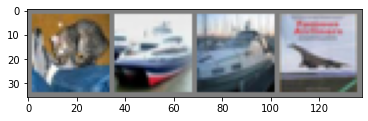

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   plane plane deer 
Accuracy of the network on the 10000 test images: 35 %
Accuracy for class: plane is 60.8 %
Accuracy for class: car   is 43.2 %
Accuracy for class: bird  is 33.1 %
Accuracy for class: cat   is 26.2 %
Accuracy for class: deer  is 24.3 %
Accuracy for class: dog   is 26.3 %
Accuracy for class: frog  is 37.4 %
Accuracy for class: horse is 32.1 %
Accuracy for class: ship  is 32.3 %
Accuracy for class: truck is 38.8 %


In [31]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.droput = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.droput(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_1 = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_1.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

With 2 hidden layer.

[1,  2000] loss: 2.152
[1,  4000] loss: 2.029
[1,  6000] loss: 1.998
[1,  8000] loss: 1.979
[1, 10000] loss: 1.948
[1, 12000] loss: 1.943
[2,  2000] loss: 1.884
[2,  4000] loss: 1.892
[2,  6000] loss: 1.879
[2,  8000] loss: 1.875
[2, 10000] loss: 1.858
[2, 12000] loss: 1.844
[3,  2000] loss: 1.809
[3,  4000] loss: 1.824
[3,  6000] loss: 1.810
[3,  8000] loss: 1.807
[3, 10000] loss: 1.804
[3, 12000] loss: 1.779
[4,  2000] loss: 1.761
[4,  4000] loss: 1.769
[4,  6000] loss: 1.759
[4,  8000] loss: 1.762
[4, 10000] loss: 1.758
[4, 12000] loss: 1.750
[5,  2000] loss: 1.708
[5,  4000] loss: 1.719
[5,  6000] loss: 1.711
[5,  8000] loss: 1.745
[5, 10000] loss: 1.719
[5, 12000] loss: 1.729
[6,  2000] loss: 1.674
[6,  4000] loss: 1.688
[6,  6000] loss: 1.704
[6,  8000] loss: 1.689
[6, 10000] loss: 1.698
[6, 12000] loss: 1.699
[7,  2000] loss: 1.656
[7,  4000] loss: 1.647
[7,  6000] loss: 1.667
[7,  8000] loss: 1.660
[7, 10000] loss: 1.661
[7, 12000] loss: 1.667
[8,  2000] loss: 1.615
[8,  4000] 

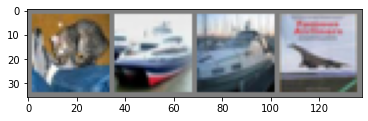

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   cat   plane plane
Accuracy of the network on the 10000 test images: 36 %
Accuracy for class: plane is 64.5 %
Accuracy for class: car   is 52.4 %
Accuracy for class: bird  is 35.1 %
Accuracy for class: cat   is 29.4 %
Accuracy for class: deer  is 30.2 %
Accuracy for class: dog   is 25.7 %
Accuracy for class: frog  is 37.4 %
Accuracy for class: horse is 28.2 %
Accuracy for class: ship  is 37.5 %
Accuracy for class: truck is 30.9 %


In [62]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)
        self.droput = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.droput(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_2 = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_2.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

With 3 hidden layer. 

[1,  2000] loss: 2.168
[1,  4000] loss: 1.891
[1,  6000] loss: 1.773
[1,  8000] loss: 1.683
[1, 10000] loss: 1.651
[1, 12000] loss: 1.598
[2,  2000] loss: 1.534
[2,  4000] loss: 1.529
[2,  6000] loss: 1.506
[2,  8000] loss: 1.468
[2, 10000] loss: 1.485
[2, 12000] loss: 1.434
[3,  2000] loss: 1.352
[3,  4000] loss: 1.373
[3,  6000] loss: 1.361
[3,  8000] loss: 1.383
[3, 10000] loss: 1.363
[3, 12000] loss: 1.339
[4,  2000] loss: 1.245
[4,  4000] loss: 1.258
[4,  6000] loss: 1.262
[4,  8000] loss: 1.294
[4, 10000] loss: 1.268
[4, 12000] loss: 1.278
[5,  2000] loss: 1.178
[5,  4000] loss: 1.174
[5,  6000] loss: 1.193
[5,  8000] loss: 1.193
[5, 10000] loss: 1.184
[5, 12000] loss: 1.195
[6,  2000] loss: 1.087
[6,  4000] loss: 1.097
[6,  6000] loss: 1.112
[6,  8000] loss: 1.119
[6, 10000] loss: 1.119
[6, 12000] loss: 1.108
[7,  2000] loss: 1.011
[7,  4000] loss: 0.997
[7,  6000] loss: 1.030
[7,  8000] loss: 1.053
[7, 10000] loss: 1.061
[7, 12000] loss: 1.052
[8,  2000] loss: 0.923
[8,  4000] 

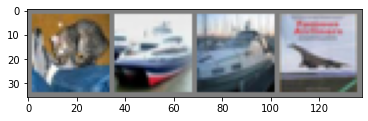

GroundTruth:  cat   ship  ship  plane
Predicted:  plane ship  ship  plane
Accuracy of the network on the 10000 test images: 53 %
Accuracy for class: plane is 58.3 %
Accuracy for class: car   is 66.0 %
Accuracy for class: bird  is 41.8 %
Accuracy for class: cat   is 46.5 %
Accuracy for class: deer  is 46.7 %
Accuracy for class: dog   is 42.1 %
Accuracy for class: frog  is 55.4 %
Accuracy for class: horse is 55.1 %
Accuracy for class: ship  is 71.1 %
Accuracy for class: truck is 56.3 %


In [59]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 10)
        self.droput = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.droput(x)
        x = self.fc5(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_3 = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_3.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

With 4 hidden layer: 

[1,  2000] loss: 2.289
[1,  4000] loss: 2.049
[1,  6000] loss: 1.897
[1,  8000] loss: 1.788
[1, 10000] loss: 1.716
[1, 12000] loss: 1.669
[2,  2000] loss: 1.599
[2,  4000] loss: 1.571
[2,  6000] loss: 1.540
[2,  8000] loss: 1.541
[2, 10000] loss: 1.500
[2, 12000] loss: 1.500
[3,  2000] loss: 1.391
[3,  4000] loss: 1.404
[3,  6000] loss: 1.410
[3,  8000] loss: 1.399
[3, 10000] loss: 1.392
[3, 12000] loss: 1.377
[4,  2000] loss: 1.282
[4,  4000] loss: 1.296
[4,  6000] loss: 1.313
[4,  8000] loss: 1.299
[4, 10000] loss: 1.298
[4, 12000] loss: 1.295
[5,  2000] loss: 1.189
[5,  4000] loss: 1.215
[5,  6000] loss: 1.233
[5,  8000] loss: 1.220
[5, 10000] loss: 1.210
[5, 12000] loss: 1.228
[6,  2000] loss: 1.088
[6,  4000] loss: 1.137
[6,  6000] loss: 1.154
[6,  8000] loss: 1.144
[6, 10000] loss: 1.152
[6, 12000] loss: 1.161
[7,  2000] loss: 1.038
[7,  4000] loss: 1.053
[7,  6000] loss: 1.051
[7,  8000] loss: 1.077
[7, 10000] loss: 1.088
[7, 12000] loss: 1.083
[8,  2000] loss: 0.963
[8,  4000] 

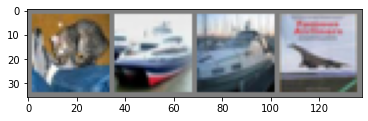

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  plane plane
Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 66.9 %
Accuracy for class: car   is 51.7 %
Accuracy for class: bird  is 44.2 %
Accuracy for class: cat   is 28.3 %
Accuracy for class: deer  is 54.1 %
Accuracy for class: dog   is 45.8 %
Accuracy for class: frog  is 59.6 %
Accuracy for class: horse is 57.6 %
Accuracy for class: ship  is 64.5 %
Accuracy for class: truck is 65.9 %


In [36]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 10)
        self.droput = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.droput(x)
        x = self.fc6(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_4 = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_4.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [56]:
print(acc_1)

[0.2852399945259094, 0.325300008058548, 0.3426400125026703, 0.3556399941444397, 0.36886000633239746, 0.37713998556137085, 0.3864800035953522, 0.3958599865436554, 0.39932000637054443, 0.40248000621795654]


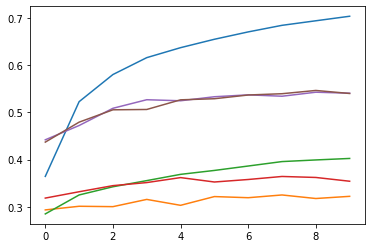

In [63]:
plt.plot(acc_cnn)
plt.plot(acc_0)
plt.plot(acc_1)
plt.plot(acc_2)
plt.plot(acc_3)
plt.plot(acc_4)
plt.show()

Explaination: 
In the picture above shows that, the accuracy is increasing as the number of epoch increases. In a ddition, the accuracy of CNN model is higher than simple full connected model. When connected model havs more layers, the accuracy would also increased, which is nature since more layers can fit the model with training set better. 

Question b: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.315
[1,  4000] loss: 2.315
[1,  6000] loss: 2.314
[1,  8000] loss: 2.312
[1, 10000] loss: 2.311
[1, 12000] loss: 2.312
[2,  2000] loss: 2.309
[2,  4000] loss: 2.309
[2,  6000] loss: 2.311
[2,  8000] loss: 2.308
[2, 10000] loss: 2.308
[2, 12000] loss: 2.308
[3,  2000] loss: 2.308
[3,  4000] loss: 2.306
[3,  6000] loss: 2.307
[3,  8000] loss: 2.307
[3, 10000] loss: 2.306
[3, 12000] loss: 2.306
[4,  2000] loss: 2.305
[4,  4000] loss: 2.306
[4,  6000] loss: 2.306
[4,  8000] loss: 2.306
[4, 10000] loss: 2.304
[4, 12000] loss: 2.305
[5,  2000] loss: 2.305
[5,  4000] loss: 2.305
[5,  6000] loss: 2.304
[5,  8000] loss: 2.305
[5, 10000] loss: 2.304
[5, 12000] loss: 2.304
[6,  2000] loss: 2.304
[6,  4000] loss: 2.303
[6,  6000] loss: 2.304
[6,  8000] loss: 2.304
[6, 10000] loss: 2.304
[6, 12000] loss: 2.304
[7,  2000] loss: 2.304
[7,  4000] loss: 2.304
[7,  6000] loss: 2.304
[7,  8000] loss: 2.303
[7, 10000] loss: 2.304
[7, 12000] loss: 2.303
[8,  2000] loss: 2.304
[8,  4000] 

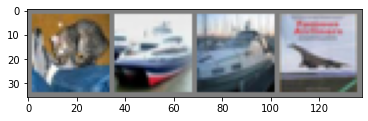

GroundTruth:  cat   ship  ship  plane
Predicted:  dog   ship  ship  ship 
Accuracy of the network on the 10000 test images: 19 %
Accuracy for class: plane is 26.9 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 3.0 %
Accuracy for class: dog   is 35.0 %
Accuracy for class: frog  is 63.8 %
Accuracy for class: horse is 1.4 %
Accuracy for class: ship  is 41.7 %
Accuracy for class: truck is 28.0 %


In [24]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_sig = []
for epoch in range(10):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_sig.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

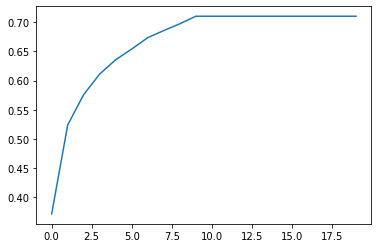

In [25]:
plt.plot(acc_cnn)
plt.plot(acc_sig)
plt.show()

Explaination: 
The accuracy of model with sigmoid function is too low to be showed in the plot. The model with ReLu is better, since ReLu function is more closer to linearity and real situation. In that case, the model would have better convergence, and would be more effective. In addition, ReLu function could avoid gradient vanish. 

Question C:

CNN with dropout and without augmentation: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.306
[1,  4000] loss: 2.304
[1,  6000] loss: 2.303
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.304
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
[3,  2000] loss: 2.304
[3,  4000] loss: 2.304
[3,  6000] loss: 2.303
[3,  8000] loss: 2.303
[3, 10000] loss: 2.303
[3, 12000] loss: 2.303
[4,  2000] loss: 2.303
[4,  4000] loss: 2.303
[4,  6000] loss: 2.303
[4,  8000] loss: 2.303
[4, 10000] loss: 2.303
[4, 12000] loss: 2.304
[5,  2000] loss: 2.303
[5,  4000] loss: 2.303
[5,  6000] loss: 2.303
[5,  8000] loss: 2.303
[5, 10000] loss: 2.303
[5, 12000] loss: 2.303
[6,  2000] loss: 2.303
[6,  4000] loss: 2.303
[6,  6000] loss: 2.303
[6,  8000] loss: 2.303
[6, 10000] loss: 2.303
[6, 12000] loss: 2.303
[7,  2000] loss: 2.303
[7,  4000] loss: 2.303
[7,  6000] loss: 2.303
[7,  8000] loss: 2.303
[7, 10000] loss: 2.303
[7, 12000] loss: 2.303
[8,  2000] loss: 2.303
[8,  4000] 

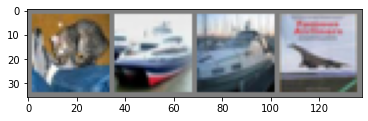

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   cat   cat   cat  
Accuracy of the network on the 10000 test images: 10 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 100.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x



net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_cnndrop = []
for epoch in range(20):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_cnndrop.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

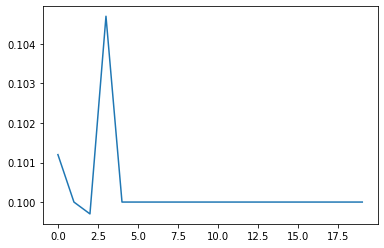

In [6]:
plt.plot(acc_cnndrop)
plt.show()

In [8]:
transform = transforms.Compose(
    [transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))],)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


CNN without dropout and with augmentation: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.305
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.300
[2, 10000] loss: 2.283
[2, 12000] loss: 2.233
[3,  2000] loss: 2.196
[3,  4000] loss: 2.184
[3,  6000] loss: 2.154
[3,  8000] loss: 2.127
[3, 10000] loss: 2.124
[3, 12000] loss: 2.093
[4,  2000] loss: 2.073
[4,  4000] loss: 2.064
[4,  6000] loss: 2.030
[4,  8000] loss: 2.017
[4, 10000] loss: 2.012
[4, 12000] loss: 1.987
[5,  2000] loss: 1.970
[5,  4000] loss: 1.939
[5,  6000] loss: 1.912
[5,  8000] loss: 1.896
[5, 10000] loss: 1.882
[5, 12000] loss: 1.841
[6,  2000] loss: 1.822
[6,  4000] loss: 1.808
[6,  6000] loss: 1.780
[6,  8000] loss: 1.743
[6, 10000] loss: 1.746
[6, 12000] loss: 1.726
[7,  2000] loss: 1.726
[7,  4000] loss: 1.687
[7,  6000] loss: 1.686
[7,  8000] loss: 1.674
[7, 10000] loss: 1.658
[7, 12000] loss: 1.635
[8,  2000] loss: 1.625
[8,  4000] 

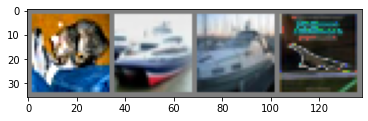

GroundTruth:  cat   ship  ship  plane
Predicted:  frog  ship  ship  car  
Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 57.8 %
Accuracy for class: car   is 68.5 %
Accuracy for class: bird  is 35.4 %
Accuracy for class: cat   is 25.5 %
Accuracy for class: deer  is 53.5 %
Accuracy for class: dog   is 41.4 %
Accuracy for class: frog  is 68.1 %
Accuracy for class: horse is 58.3 %
Accuracy for class: ship  is 66.3 %
Accuracy for class: truck is 62.5 %


In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_cnnaug = []
for epoch in range(20):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_cnnaug.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

CNN with dropout and augmentation: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.305
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.303
[2,  6000] loss: 2.304
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
[3,  2000] loss: 2.303
[3,  4000] loss: 2.303
[3,  6000] loss: 2.303
[3,  8000] loss: 2.303
[3, 10000] loss: 2.303
[3, 12000] loss: 2.303
[4,  2000] loss: 2.303
[4,  4000] loss: 2.303
[4,  6000] loss: 2.303
[4,  8000] loss: 2.303
[4, 10000] loss: 2.303
[4, 12000] loss: 2.303
[5,  2000] loss: 2.303
[5,  4000] loss: 2.303
[5,  6000] loss: 2.303
[5,  8000] loss: 2.303
[5, 10000] loss: 2.303
[5, 12000] loss: 2.303
[6,  2000] loss: 2.303
[6,  4000] loss: 2.303
[6,  6000] loss: 2.303
[6,  8000] loss: 2.303
[6, 10000] loss: 2.303
[6, 12000] loss: 2.303
[7,  2000] loss: 2.303
[7,  4000] loss: 2.303
[7,  6000] loss: 2.303
[7,  8000] loss: 2.303
[7, 10000] loss: 2.303
[7, 12000] loss: 2.303
[8,  2000] loss: 2.303
[8,  4000] 

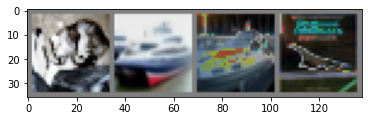

GroundTruth:  cat   ship  ship  plane
Predicted:  ship  ship  ship  ship 
Accuracy of the network on the 10000 test images: 10 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 100.0 %
Accuracy for class: truck is 0.0 %


In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x



net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

acc_cnndropaug = []
for epoch in range(20):  # loop over the dataset multiple times
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_cnndropaug.append(acc)
print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

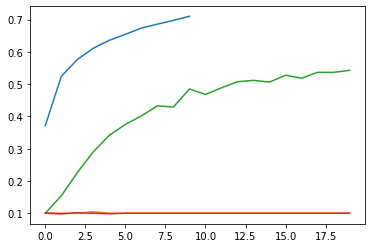

In [18]:
plt.plot(acc_cnn)
plt.plot(acc_cnndrop)
plt.plot(acc_cnnaug)
plt.plot(acc_cnndropaug)
plt.show()

Explaination: 
Since the limitation of computer, the models are only up to 20 epochs. The results shows that both augmentation and dropout are worse. For dropout, our models only have very small number of layers, thus dropout does not suitable for the situation. However, in expectation, the performance of models with augmentation would be better when epoch increses. Since augmentation would help the model to fit the train set better. It has the risk of overffiting, which means the model have good performance in training set and bad performance in test set.  